In [ ]:
! pip install qiskit
from qiskit import *
import qiskit.circuit.library as lib
import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pi = np.pi
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cp(pi/2, 0, 1)
circ.h(1)
circ.swap(0,1)
circ.measure(0,0)
circ.measure(1,1)


In [ ]:
circ.draw()

┌───┐                 ┌─┐   
q_0: ┤ H ├─■─────────────X─┤M├───
     └───┘ │P(π/2) ┌───┐ │ └╥┘┌─┐
q_1: ──────■───────┤ H ├─X──╫─┤M├
                   └───┘    ║ └╥┘
c: 2/═══════════════════════╩══╩═
                            0  1

{'11': 271, '01': 273, '10': 210, '00': 270}


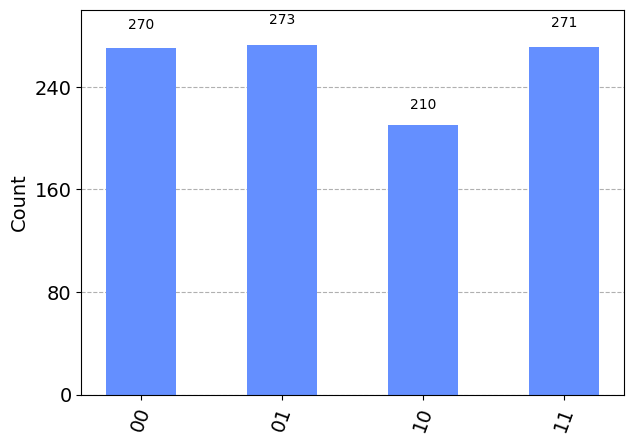

In [ ]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim_ex = backend_sim.run(transpile(circ, backend_sim), shots=1024)

# Grab the results from the job.
result_sim_ex = job_sim_ex.result()

counts = result_sim_ex.get_counts(circ)
print(counts)
# import basic plot tools
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As the input we provided was just the state 00, this corresponds to a signal with a single peak and as expected the fourier transform gives an output equally spread across all the frequency domains

In [ ]:
pi = np.pi
circ2 = QuantumCircuit(2,2)
circ2.h(0)
circ2.cp(pi/2, 0, 1)
circ2.h(1)
circ2.swap(0,1)
inverse = lib.QFT(num_qubits = 2, inverse = True)
circ2.append(inverse,[0,1])
circ2.measure(0,0)
circ2.measure(1,1)
#Here we apply the inverse QFT block after the QFT circuit to check the functioning of the inbuilt qiskit class







In [ ]:
circ2.draw()

┌───┐                 ┌───────┐┌─┐   
q_0: ┤ H ├─■─────────────X─┤0      ├┤M├───
     └───┘ │P(π/2) ┌───┐ │ │  IQFT │└╥┘┌─┐
q_1: ──────■───────┤ H ├─X─┤1      ├─╫─┤M├
                   └───┘   └───────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

{'00': 1024}


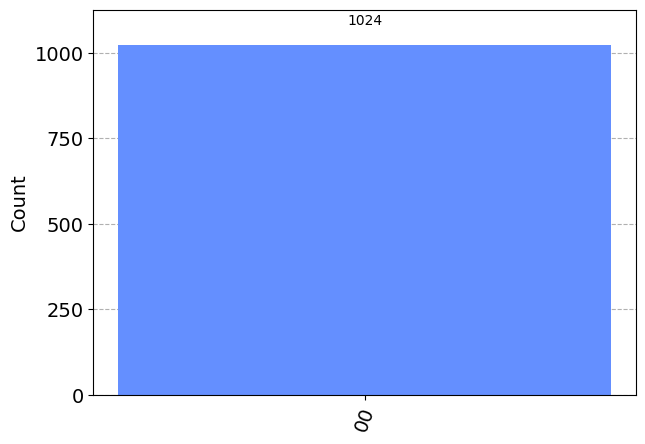

In [ ]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim_ex = backend_sim.run(transpile(circ2, backend_sim), shots=1024)

# Grab the results from the job.
result_sim_ex = job_sim_ex.result()

counts = result_sim_ex.get_counts(circ2)
print(counts)
# import basic plot tools
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As expected the inverse gate brings back the original original state of 00